In [5]:
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
model = XGBClassifier()
model.load_model('../spock/models/spock.json')
# XGBoost model doesn't save feature names so have to map them manually
features = ['EMcrossnear', 'EMfracstdnear', 'EPstdnear', 'MMRstrengthnear', 'EMcrossfar', 'EMfracstdfar', 'EPstdfar', 'MMRstrengthfar', 'MEGNO', 'MEGNOstd']
featdic = {'f{0}'.format(i):feat for i, feat in enumerate(features)}

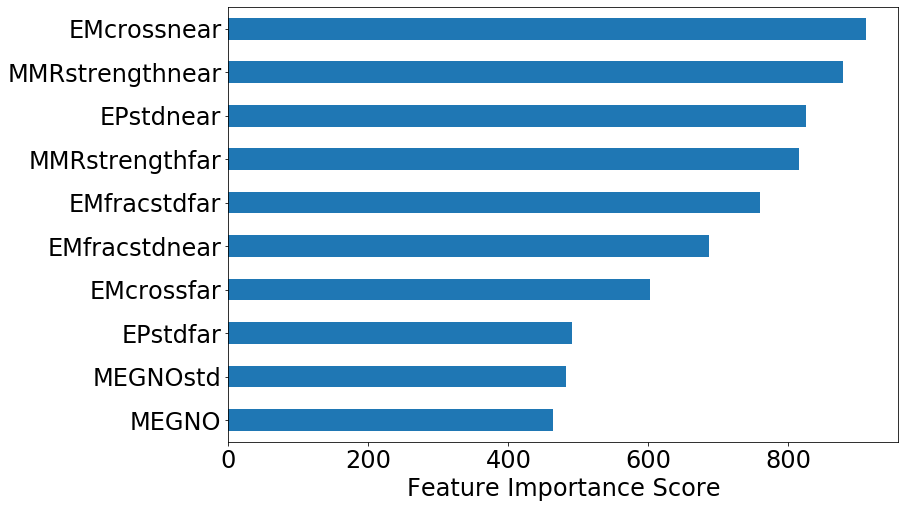

In [7]:
# feature importances
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
ax = feat_imp.plot.barh(figsize=(12,8), fontsize=24)
labels = [featdic[label.get_text()] for label in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.set_xlabel('Feature Importance Score', fontsize=24)
ax.invert_yaxis()
plt.savefig('featureimportances.pdf', bbox_inches='tight')

In [8]:
feat_imp

f0    911
f3    878
f2    825
f7    815
f5    759
f1    687
f4    602
f6    491
f9    482
f8    464
dtype: int64